<img src="https://cybersecurity-excellence-awards.com/wp-content/uploads/2017/06/366812.png">

<h1><center>Darwin Supervised Classification Model Building </center></h1>

Prior to getting started, there are a few things you want to do:
1. Set the dataset path.
2. Enter your username and password to ensure that you're able to log in successfully

Once you're up and running, here are a few things to be mindful of:
1. For every run, look up the job status (i.e. requested, failed, running, completed) and wait for job to complete before proceeding. 
2. If you're not satisfied with your model and think that Darwin can do better by exploring a larger search space, use the resume function.

## Import libraries

In [1]:
# Import necessary libraries
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Image
from time import sleep
import os
import numpy as np
from sklearn.metrics import classification_report

from amb_sdk.sdk import DarwinSdk

## Setup

**Login to Darwin**<br>
Enter your registered username and password below to login to Darwin.

In [2]:
# Login
ds = DarwinSdk()
ds.set_url('https://amb-demo-api.sparkcognition.com/v1/')
status, msg = ds.auth_login_user('d.archibald84@gmail.com', 'aDeuVK8S2v')

if not status:
    print(msg)

**Data Path** <br>
In the cell below, set the path to your dataset, the default is Darwin's example datasets

In [3]:
path = '../../sets/'

## Data Upload and Clean

**Read dataset and view a file snippet**

After setting up the dataset path, the next step is to upload the dataset from your local device to the server. <br> In the cell below, you need to specify the dataset_name if you want to use your own data.

In [4]:
dataset_name = 'pha.csv'
df = pd.read_csv(os.path.join(path, dataset_name))
df.head()

,Object,Epoch (TDB),a (AU),e,i (deg),w (deg),Node (deg),M (deg),q (AU),Q (AU),P (yr),H (mag),MOID (AU),ref,class,Object.1
0,1566 Icarus,57800,1.078066,0.826854,22.825495,31.382966,88.010681,215.528772,0.1867,1.97,1.12,16.90,0.034507,100,APO*,1566 Icarus
1,1620 Geographos,57800,1.245304,0.335342,13.337482,276.893024,337.207958,104.155606,0.8277,1.66,1.39,15.60,0.030669,448,APO*,1620 Geographos
2,1862 Apollo,55249,1.470264,0.559922,6.352995,285.852564,35.736768,174.626213,0.6470,2.29,1.78,16.25,0.025795,263,APO*,1862 Apollo
3,1981 Midas,57800,1.776025,0.650141,39.832538,267.791993,356.903343,173.188556,0.6214,2.93,2.37,15.20,0.003551,118,APO*,1981 Midas
4,2101 Adonis,57800,1.874123,0.764602,1.326400,43.388048,349.694944,235.158622,0.4412,3.31,2.57,18.80,0.011645,33,APO*,2101 Adonis


**Upload dataset to Darwin**

In [11]:
# Upload dataset
ds.delete_dataset(dataset_name)
status, dataset = ds.upload_dataset(os.path.join(path, dataset_name))
if not status:
    print(dataset)

**Clean dataset**

In [12]:
# clean dataset
target = "class"
status, job_id = ds.clean_data(dataset_name, target = target)

if status:
    ds.wait_for_job(job_id['job_name'])
else:
    print(job_id)

{'status': 'Requested', 'starttime': '2019-04-21T12:33:46.855491', 'endtime': None, 'percent_complete': 0, 'job_type': 'CleanDataTiny', 'loss': None, 'generations': None, 'dataset_names': ['pha.csv'], 'artifact_names': ['900a5733434344c88641592e003be769'], 'model_name': None, 'job_error': None}
{'status': 'Complete', 'starttime': '2019-04-21T12:33:46.855491', 'endtime': '2019-04-21T12:33:49.226446', 'percent_complete': 100, 'job_type': 'CleanDataTiny', 'loss': None, 'generations': None, 'dataset_names': ['pha.csv'], 'artifact_names': ['900a5733434344c88641592e003be769'], 'model_name': None, 'job_error': ''}


## Create and Train Model 

We will now build a model that will learn the class labels in the target column.<br> In the default cancer dataset, the target column is "Diagnosis". <br> You will have to specify your own target name for your custom dataset. <br> You can also increase max_train_time for longer training.


In [13]:
model = target + "_model0"
ds.delete_model(model)
status, job_id = ds.create_model(dataset_names = dataset_name, \
                                 model_name =  model, \
                                 max_train_time = '00:02')
if status:
    ds.wait_for_job(job_id['job_name'])
else:
    print(job_id)

{'status': 'Requested', 'starttime': '2019-04-21T12:34:09.925899', 'endtime': None, 'percent_complete': 0, 'job_type': 'TrainModel', 'loss': None, 'generations': 0, 'dataset_names': ['pha.csv'], 'artifact_names': None, 'model_name': 'class_model0', 'job_error': None}
{'status': 'Running', 'starttime': '2019-04-21T12:34:09.925899', 'endtime': None, 'percent_complete': 4, 'job_type': 'TrainModel', 'loss': 1.0492045879364014, 'generations': 4, 'dataset_names': ['pha.csv'], 'artifact_names': None, 'model_name': 'class_model0', 'job_error': ''}
{'status': 'Running', 'starttime': '2019-04-21T12:34:09.925899', 'endtime': None, 'percent_complete': 4, 'job_type': 'TrainModel', 'loss': 1.0492045879364014, 'generations': 4, 'dataset_names': ['pha.csv'], 'artifact_names': None, 'model_name': 'class_model0', 'job_error': ''}
{'status': 'Running', 'starttime': '2019-04-21T12:34:09.925899', 'endtime': None, 'percent_complete': 4, 'job_type': 'TrainModel', 'loss': 1.0492045879364014, 'generations': 4,

## Extra Training (Optional)
Run the following cell for extra training, no need to specify parameters

In [20]:
# Train some more
status, job_id = ds.resume_training_model(dataset_names = dataset_name,
                                          model_name = model,
                                          max_train_time = '00:05')
                                          
if status:
    ds.wait_for_job(job_id['job_name'])
else:
    print(job_id)

{'status': 'Requested', 'starttime': '2019-04-18T15:24:03.473112', 'endtime': None, 'percent_complete': 0, 'job_type': 'UpdateModel', 'loss': 1.2340340614318848, 'generations': 2, 'dataset_names': ['pha.csv'], 'artifact_names': None, 'model_name': 'class_model0', 'job_error': None}
{'status': 'Running', 'starttime': '2019-04-18T15:24:03.473112', 'endtime': None, 'percent_complete': 0, 'job_type': 'UpdateModel', 'loss': 1.2340340614318848, 'generations': 5, 'dataset_names': ['pha.csv'], 'artifact_names': None, 'model_name': 'class_model0', 'job_error': ''}
{'status': 'Running', 'starttime': '2019-04-18T15:24:03.473112', 'endtime': None, 'percent_complete': 0, 'job_type': 'UpdateModel', 'loss': 1.2340340614318848, 'generations': 5, 'dataset_names': ['pha.csv'], 'artifact_names': None, 'model_name': 'class_model0', 'job_error': ''}
{'status': 'Running', 'starttime': '2019-04-18T15:24:03.473112', 'endtime': None, 'percent_complete': 0, 'job_type': 'UpdateModel', 'loss': 1.2340340614318848,

## Analyze Model
Analyze model provides feature importance ranked by the model. <br> It indicates a general view of which features pose a bigger impact on the model

In [14]:
# Retrieve feature importance of built model
status, artifact = ds.analyze_model(model)
sleep(1)
if status:
    ds.wait_for_job(artifact['job_name'])
else:
    print(artifact)
status, feature_importance = ds.download_artifact(artifact['artifact_name'])

{'status': 'Running', 'starttime': '2019-04-21T12:40:31.178918', 'endtime': None, 'percent_complete': 0, 'job_type': 'AnalyzeModel', 'loss': 1.0492045879364014, 'generations': 4, 'dataset_names': None, 'artifact_names': ['9f0fbf4b4a104251927d267fe9644c63'], 'model_name': 'class_model0', 'job_error': ''}
{'status': 'Complete', 'starttime': '2019-04-21T12:40:31.178918', 'endtime': '2019-04-21T12:40:39.673136', 'percent_complete': 100, 'job_type': 'AnalyzeModel', 'loss': 1.0492045879364014, 'generations': 4, 'dataset_names': None, 'artifact_names': ['9f0fbf4b4a104251927d267fe9644c63'], 'model_name': 'class_model0', 'job_error': ''}


Show the 10 most important features of the model.

In [16]:
feature_importance[:]

q (AU)         0.295871
P (yr)         0.273159
a (AU)         0.216002
H (mag)        0.066087
Q (AU)         0.064604
e              0.018283
w (deg)        0.015631
MOID (AU)      0.014860
Node (deg)     0.010012
ref            0.008824
M (deg)        0.008509
i (deg)        0.007308
Epoch (TDB)    0.000850
dtype: float64

## Predictions
**Perform model prediction on the the training dataset.**

In [17]:
status, artifact = ds.run_model(dataset_name, model)
sleep(1)
ds.wait_for_job(artifact['job_name'])

{'status': 'Running', 'starttime': '2019-04-21T12:53:56.402763', 'endtime': None, 'percent_complete': 0, 'job_type': 'RunModel', 'loss': 1.0492045879364014, 'generations': 4, 'dataset_names': ['pha.csv'], 'artifact_names': ['6b373f7dc6f1408791747986fb783302'], 'model_name': 'class_model0', 'job_error': ''}
{'status': 'Complete', 'starttime': '2019-04-21T12:53:56.402763', 'endtime': '2019-04-21T12:53:58.108148', 'percent_complete': 100, 'job_type': 'RunModel', 'loss': 1.0492045879364014, 'generations': 4, 'dataset_names': ['pha.csv'], 'artifact_names': ['6b373f7dc6f1408791747986fb783302'], 'model_name': 'class_model0', 'job_error': ''}


(True, 'Job completed')

Download predictions from Darwin's server.

In [18]:
status, prediction = ds.download_artifact(artifact['artifact_name'])
prediction.head()

,class,prob_AMO*,prob_APO,prob_APO*,prob_ATE,prob_ATE*,prob_IEO*
0,APO*,0.000152,0.000016,0.999832,0.0,0.000000,0.0
1,APO*,0.003012,0.000016,0.996949,0.0,0.000022,0.0
2,APO*,0.000854,0.000016,0.999081,0.0,0.000049,0.0
3,APO*,0.000198,0.000016,0.999737,0.0,0.000049,0.0
4,APO*,0.000480,0.000000,0.999471,0.0,0.000049,0.0


Create plots comparing predictions with actual target

              precision    recall  f1-score   support

        AMO*       1.00      1.00      1.00        77
         APO       1.00      1.00      1.00        11
        APO*       1.00      1.00      1.00      1268
         ATE       1.00      1.00      1.00         7
        ATE*       1.00      1.00      1.00       132
        IEO*       1.00      1.00      1.00         4

   micro avg       1.00      1.00      1.00      1499
   macro avg       1.00      1.00      1.00      1499
weighted avg       1.00      1.00      1.00      1499



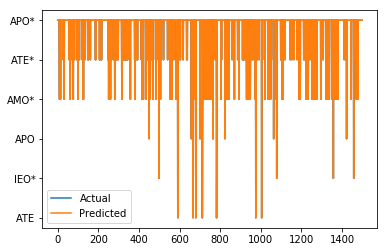

In [19]:
unq = prediction[target].unique()[::-1]
p = np.zeros((len(prediction),))
a = np.zeros((len(prediction),))
for i,q in enumerate(unq):
    p += i*(prediction[target] == q).values
    a += i*(df[target] == q).values
#Plot predictions vs actual
plt.plot(a)
plt.plot(p)
plt.legend(['Actual','Predicted'])
plt.yticks([i for i in range(len(unq))],[q for q in unq]);
print(classification_report(df[target], prediction[target]))

**Perform model prediction on a test dataset that wasn't used in training.** <br>
Upload test dataset

In [21]:
test_data = 'pha_test.csv'
ds.delete_dataset(test_data)
status, dataset = ds.upload_dataset(os.path.join(path, test_data))
if not status:
    print(dataset)

clean test data

In [22]:
# clean test dataset
status, job_id = ds.clean_data(test_data, target = target, model_name = model)

if status:
    ds.wait_for_job(job_id['job_name'])
else:
    print(job_id)

{'status': 'Requested', 'starttime': '2019-04-21T13:03:13.556655', 'endtime': None, 'percent_complete': 0, 'job_type': 'CleanDataTiny', 'loss': None, 'generations': None, 'dataset_names': ['pha_test.csv'], 'artifact_names': ['85728a9aaf1c4561915d671dd6ba7ed9'], 'model_name': None, 'job_error': None}
{'status': 'Complete', 'starttime': '2019-04-21T13:03:13.556655', 'endtime': '2019-04-21T13:03:15.254457', 'percent_complete': 100, 'job_type': 'CleanDataTiny', 'loss': None, 'generations': None, 'dataset_names': ['pha_test.csv'], 'artifact_names': ['85728a9aaf1c4561915d671dd6ba7ed9'], 'model_name': None, 'job_error': ''}


Run model on test dataset.

In [23]:
status, artifact = ds.run_model(test_data, model)
sleep(1)
ds.wait_for_job(artifact['job_name'])

{'status': 'Running', 'starttime': '2019-04-21T13:04:05.217653', 'endtime': None, 'percent_complete': 0, 'job_type': 'RunModel', 'loss': 1.0492045879364014, 'generations': 4, 'dataset_names': ['pha_test.csv'], 'artifact_names': ['8ee86b24cc4742c08f9f43e3d4a60b17'], 'model_name': 'class_model0', 'job_error': ''}
{'status': 'Complete', 'starttime': '2019-04-21T13:04:05.217653', 'endtime': '2019-04-21T13:04:14.312452', 'percent_complete': 100, 'job_type': 'RunModel', 'loss': 1.0492045879364014, 'generations': 4, 'dataset_names': ['pha_test.csv'], 'artifact_names': ['8ee86b24cc4742c08f9f43e3d4a60b17'], 'model_name': 'class_model0', 'job_error': ''}


(True, 'Job completed')

Create plots comparing predictions with actual target

              precision    recall  f1-score   support

        AMO*       1.00      0.95      0.97        19
         APO       1.00      1.00      1.00         3
        APO*       1.00      1.00      1.00       209
        ATE*       1.00      1.00      1.00        17
        IEO*       1.00      1.00      1.00         1

   micro avg       1.00      1.00      1.00       249
   macro avg       1.00      0.99      0.99       249
weighted avg       1.00      1.00      1.00       249



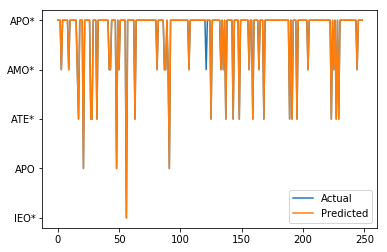

In [24]:
# Create plots comparing predictions with actual target
status, prediction = ds.download_artifact(artifact['artifact_name'])
df = pd.read_csv(os.path.join(path,test_data))
unq = prediction[target].unique()[::-1]
p = np.zeros((len(prediction),))
a = np.zeros((len(prediction),))
for i,q in enumerate(unq):
    p += i*(prediction[target] == q).values
    a += i*(df[target] == q).values
#Plot predictions vs actual
plt.plot(a)
plt.plot(p)
plt.legend(['Actual','Predicted'])
plt.yticks([i for i in range(len(unq))],[q for q in unq]);
print(classification_report(df[target], prediction[target]))

## Find out which machine learning model did Darwin use:

In [25]:
status, model_type = ds.lookup_model_name(model)
print(model_type['description']['best_genome'])

{'type': 'RandomForestClassifier', 'parameters': {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 4, 'max_features': 0.7376889804183513, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 16, 'n_jobs': -1, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 219}}


### Outcome  
It seems that the model we built ended up using a Random Forest Classifier (explain what it is here). This is actually the model that Professor Beasley predicted would do best. Because the dataset is on the smaller side, it struggles inside a neural network classifier since neural networks are best used when there is a lot of data. We are fairly limited to what space agencies have discovered, and therefore are rather limited on sample size. We were able to acheive a very high precision and recall, but we agreed that this is also indicative of a smaller dataset and perhaps a lack of variety in the dataset, since many asteroids are close to each other. This is discussed in a little more detail in the paper for this project.  
#### Did we solve the problem?  
Overall, we believe that we did solve the problem. This is an accurate system that can help predict the danger of new near-earth objects. Since we discussed that asteroids are often very close to each other, it could be possible that this system would be useful if asteroids crashed into each other and changed their positioning or velocity, or if the asteroid fragmented into smaller asteroids. The smaller asteroids could then be classified using this model, and would play nicely with the model. We believe that with a dataset that went out further and expanded over further objects may be even more useful in classifying new objects since there would be more data on objects that were not necessarily near earth objects but may become near earth objects that would need to be classified. However, we solved a more specific problem in this case, since not all near earth objects are actually dangerous, and it is even more important to figure out which ones are.